## Math 538: Homework 6

Stephen Giang

RedID: 823184070

Due: 10-24-24


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

For the logistic map $f(x)=ax(1-x)$, write a program to compute the Lyapunov exponent and reproduce Fig. 6.3. Also plot (just below) the bifurcation diagram for the same $a$-window and compare/discuss both plots. Elaborate!

<img src="figs/fig6.3a.png" width="300" height="300"/> <img src="figs/fig6.3b.png" width="300" height="300"/>

<img src="figs/fig6.3d.png" width="600" />


In [2]:
def Lyapunov(f, df, x_1, n):
    x_k = x_1
    L_num = 1
    for k in range(1, n + 1):
        L_num *= np.abs(df(x_k))
        x_k = f(x_k)
        if L_num == 0:
            return 0, -1e9
    L_num = np.power(L_num, 1 / n)
    L_exp = np.log(L_num) if L_num > 0 else 0
    return L_num, L_exp

def logistics(a):
    return lambda x: a * x * (1 - x)

def d_logistics(a):
    return lambda x: a * (1 - 2 * x)

def plot_Lyapunov_Exp(a_range, f, df, n):
    L_exp_range = []
    for a in a_range:
        x = np.random.random()
        L_num, L_exp = Lyapunov(f(a), df(a), x, n)
        L_exp_range.append(L_exp)
    plt.figure()
    plt.grid()
    plt.plot(a_range, L_exp_range, 'b-')
    plt.xlabel('$a$')
    plt.ylabel('$h(x_1)$')
    plt.title('Lyapunov Exponent at Different $a$ values')
    plt.ylim(-1, 1)

def plot_bifurication(a_range, f):
    x_vals = []
    for a in a_range:
        x = np.random.random()
        for _ in range(int(1_000)):
            x = f(a)(x)
        x_vals.append(x)
    plt.figure()
    plt.grid()
    plt.plot(a_range, x_vals, ',')
    plt.xlabel('$a$')
    plt.ylabel('$g_a(x)$')
    plt.title('Bifurication - Logistics Map')

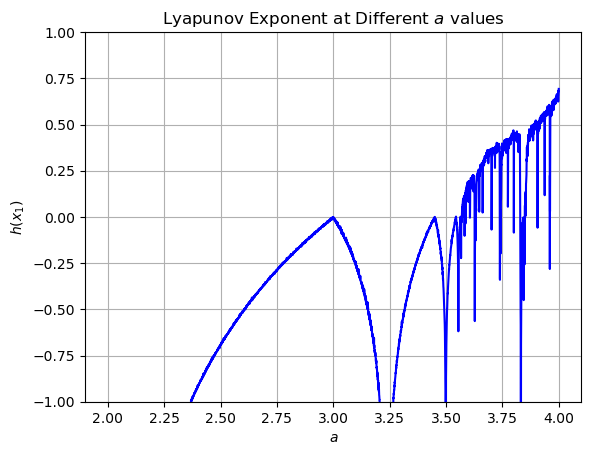

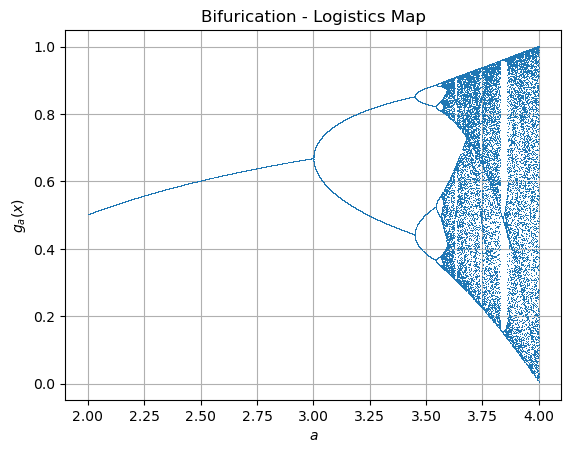

In [3]:
a_range = np.linspace(2, 4, int(5e3))
plot_Lyapunov_Exp(a_range, logistics, d_logistics, int(7.5e2))

a_range = np.linspace(2, 4, int(1e5))
plot_bifurication(a_range, logistics)

### Problem 2

Do the same for the cubic map of the extra credit of HW#03: $f(x) =ax^3 + (1-a) x$, for $a$ in $[2,4]$.


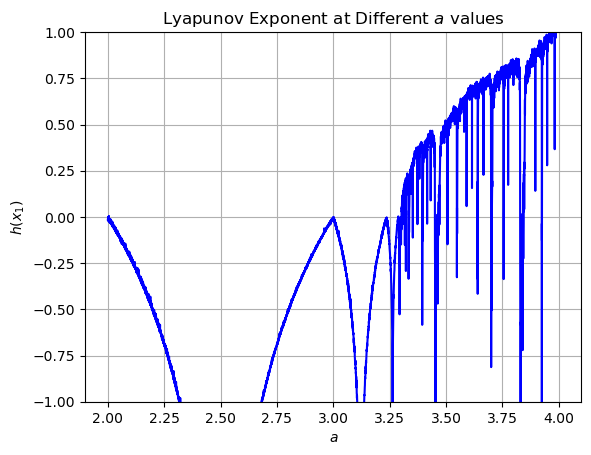

In [4]:
def cubic(a):
    return lambda x: (a * (x ** 3)) + ((1 - a) * x)

def d_cubic(a):
    return lambda x: (3 * a * (x ** 2)) + (1 - a)

a_range = np.linspace(2, 4, int(8e3))
plot_Lyapunov_Exp(a_range, cubic, d_cubic, int(6e2))

### Problem 3.1

Let $f_a(x) = a - x^2$, where $a$ is a constant.


#### Problem 3.1a

Find a value $a_1$ of the parameter $a$ for which $f_a$ has exactly one fixed point.

First, we need to set $f_{a_1}(x_k) = x_k$,

$$
\begin{align*}
    f_{a_1}(x_k) = a_1 - x_k^2 &= x_k \\
    x_k^2 + x_k - a_1 &= 0
\end{align*}
$$

such that, we get the following solution:
$$x_k = \frac{1}{2} \bigg(-1 \pm \sqrt{1 + 4a_1}\bigg)$$
To have exactly one fixed point, we get the following:
$$\sqrt{1 + 4a_1} = 0 \qquad 1 + 4a_1 = 0 \qquad a_1 = -\frac{1}{4}$$


#### Problem 3.1b

Describe the limit of all orbits of $f_a$ for $a < a_1$

Notice for $a < a_1$, we get no real fixed points. Also, we get that:

$$ f_{a}(x) = a - x^2 < 0$$

Due to the qualities of always being negative and having no fixed points, we can say that all orbits of $f_a$ for $a < a_1$ tend toward $-\infty$

#### Problem 3.1c

The map $f_a$ has an attracting fixed point for $a$ in the open interval $(a_1, a_2)$. Find $a_2$.

Notice the fixed point, $x_k$:

$$
x_k = \frac{1}{2} \bigg(-1 \pm \sqrt{1 + 4a}\bigg)
$$

For that fixed point to be attracting, we need the following to be true:

$$ |f_{a}'(x_k)| = |-2x_k| < 1 $$

such that we get:
$$
\begin{array}{rcccl}
    -1 & < & -2x_k & < & 1 \\
    -1 & < & -2\bigg(\frac{1}{2} \bigg(-1 \pm \sqrt{1 + 4a}\bigg)\bigg) & < & 1 \\
    1 & > & -1 \pm \sqrt{1 + 4a} & > & -1 \\
    2 & > & \pm \sqrt{1 + 4a} & > & 0 \\
    4 & > & 1 + 4a & > & 0 \\
    2 & > & 4a & > & -1 \\
    \frac{3}{4} & > & a & > & -\frac{1}{4} = a_1
\end{array}
$$
such that we get:
$$ a_2 = \frac{3}{4}$$


#### Problem 3.1d

The map $f_a$ has an attracting period-two point for $a$ in the open interval $(a_2, a_3)$. Find $a_3$.

Notice the period-two point, $x_{2k}$:

$$
\begin{align*}
    f^2(x_{2k}) &= x_{2k} \\
    a - (a - x_{2k}^2)^2 &= x_{2k} \\
    a - (a^2 - 2ax_{2k}^2 + x_{2k}^4) &= x_{2k} \\
    a - a^2 + 2ax_{2k}^2 - x_{2k}^4 &= x_{2k} \\
    x_{2k}^4 - 2ax_{2k}^2 + x_{2k} + (a^2 - a) &= 0 \\
    (x_{2k}^2 + x_{2k} - a)(x_{2k}^2 - x_{2k} + (1 - a)) &= 0 \\
\end{align*}
$$
such that we get:
$$ x_{2k} = \frac{1}{2}\bigg(1 \pm \sqrt{-3 + 4a}\bigg)$$

For this period-two point to be attracting, we need the following to be true:
$$ |f_{a}'(x_{2k})| = |-2x_{2-1}||-2x_{2-2}| < 1 $$

$$
\begin{array}{rcccl}
    & ~ & |-2x_{2-1}||-2x_{2-2}| & < & 1 \\
    & ~ & |1 - \sqrt{-3 + 4a}||1 + \sqrt{-3 + 4a}| & < & 1 \\
    & ~ & |1 - (-3 + 4a)| & < & 1 \\
    & ~ & |4 -  4a| & < & 1 \\
    -1 & < & 4 -  4a & < & 1 \\
    -5 & < & -4a & < & -3 \\
    \frac{5}{4} & > & a & > & \frac{3}{4} \\

\end{array}
$$

such that we get:
$$ a_3 = \frac{5}{4}$$

#### Problem 3.1e

Describe the dynamics of $f_a$ for $a = 2$.

Notice the following for $a = 2$:
$$ f_2(x) = 2 - x^2 $$

We get a fixed points at:
$$ x = 1 \text{ and } x = -2 $$
Notice that none of these points are within the range from above, such that they are not attracting fixed points

We get period 2 points at:
$$ x = \frac{1}{2}\bigg(1 \pm \sqrt{5}\bigg) $$
Notice that none of these points are within the range from above, such that they are not attracting period-2 points.

#### Problem 3.3a

Find a conjugacy $C$ between $G(x) = 4x(1 - x)$ and $g(x) = 2 - x^2$.

By the definition of a Conjugacy, we get:

$$ C(G(x)) = g(C(x)) $$

Let $C$ be the conjugacy function for $G$ and $g$, and also let $C$ be linear:
$$ C(x) = ax + b $$
such that we get:
$$ a(4x(1-x)) + b = 2 - (ax + b)^2$$
Now we simply to solve for $a$ and $b$:

$$
\begin{align*}
    4ax - 4ax^2 + b &= 2 - a^2x^2 - 2abx - b^2 \\
    -4ax^2 + 4ax + b &= - a^2x^2 - 2abx + (- b^2 + 2)
\end{align*}
$$

Solving for the coefficients, we get the following system:

$$
-4a = -a^2 \rightarrow a = 2,0 \qquad b = -b^2 + 2 \rightarrow b = -2,1 \qquad 4a = -2ab \rightarrow (a,b) = (0,1),(0,-2),(2, -2)
$$

Assuming that $a \not = 0$, we get the following conjugacy:
$$ C(x) = 2x - 2 $$


#### Problem 3.3b

Show that $g(x)$ has chaotic orbits.

It was proved earlier in the text, that there exists a $c_1(x)$ such that $c_1(T(x)) = G(x)$, where $T(x)$ is the tent map. We proved above that there exists a $c_2(x)$ such that $c_2(c_1(T(x))) = c_2(G(x)) = g(x)$.  Because the Tent Map was proven to have chaotic orbits, then by there existing a finite number of conjugacies between the Tent Function and $g(x)$, $g(x)$ has chaotic orbits


### Problem 3.4

Show that $g(x) = 2.5x(1 - x)$ has no chaotic orbits.

By observation of the function, we know that all points between $(0, 1)$ are attracted to the fixed point $x_k = 0.6$. All points outside of this domain, tend towards $\infty$. Thus there are no chaotic orbits for $g(x) = 2.5x(1 - x)$.


### Problem 3.15a

A perfect shuffle is performed by dividing a 52-card deck in half,
and interleaving the halves, so that the cards from the top half alternate with the
cards from the bottom half. The top card stays on top, and so it and the bottom
card are fixed by this operation. Show that 8 perfect shuffles return the deck to its
original order. [Hint: Number the original card order from 0 to 51. Then a perfect
shuffle can be expressed as the map

$$
f(n) = \begin{cases}
    2n & \text{ if } 0 \leq n \leq 25 \\
    2n - 51 & \text{ if } 26 \leq n \leq 51
\end{cases}
$$

The goal is to show that all integers are fixed points under $f^8$.
First show that $f^8(n) = 2^8n - 51k$ for some integer $k$, where $k$ may be different for different $n$.]
Caution: when demonstrating at actual parties, be sure to remove the jokers first! If the deck consists of 54 cards, then 52 perfect shuffles are required.


Notice that we can rewrite the function as:
$$ f(n) = 2n\mod 51 $$

Also notice this very simple fact:
$$ n \mod 51 = n \qquad \forall n \leq 51 $$

Shuffling the cards 8 times for $n \leq 51$, we get:
$$ f^8(n) = 2^8n\mod 51 = 256n\mod51 = ((256\mod51) \times (n\mod 51))\mod 51 = (1 \times n)\mod 51 = n\mod 51 = n$$

Such that, after 8 shuffles, we get back to our original order of $n$.



### Problem 3.15b

If the bottom card 51 is ignored (it is fixed by the map anyway), the
above map is $f(x) = 2x $(mod $51$), where we now consider $x$ to be a real number.
Nonperiodic orbits have Lyapunov number equal to 2, yet every integer point is
periodic with period a divisor of 8. Sharkovskii’s Theorem shows that it is typical for
chaotic maps to contain many periodic orbits. Find all possible periods for periodic
orbits for this map on the interval $[0, 51]$.

In [5]:
f = lambda x: (2 * x) % 51

def iterateN(f, x, N):
    iterates = []
    for i in range(N):
        iterates.append(x)
        x = f(x)
    iterates.append(x)
    return iterates

for x in range(52):
    iterates = iterateN(f, x, 10)
    if len(iterates) != len(set(iterates)):
        print('Periodic Orbit Found at: x =', x, iterates)

Periodic Orbit Found at: x = 0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Periodic Orbit Found at: x = 1 [1, 2, 4, 8, 16, 32, 13, 26, 1, 2, 4]
Periodic Orbit Found at: x = 2 [2, 4, 8, 16, 32, 13, 26, 1, 2, 4, 8]
Periodic Orbit Found at: x = 3 [3, 6, 12, 24, 48, 45, 39, 27, 3, 6, 12]
Periodic Orbit Found at: x = 4 [4, 8, 16, 32, 13, 26, 1, 2, 4, 8, 16]
Periodic Orbit Found at: x = 5 [5, 10, 20, 40, 29, 7, 14, 28, 5, 10, 20]
Periodic Orbit Found at: x = 6 [6, 12, 24, 48, 45, 39, 27, 3, 6, 12, 24]
Periodic Orbit Found at: x = 7 [7, 14, 28, 5, 10, 20, 40, 29, 7, 14, 28]
Periodic Orbit Found at: x = 8 [8, 16, 32, 13, 26, 1, 2, 4, 8, 16, 32]
Periodic Orbit Found at: x = 9 [9, 18, 36, 21, 42, 33, 15, 30, 9, 18, 36]
Periodic Orbit Found at: x = 10 [10, 20, 40, 29, 7, 14, 28, 5, 10, 20, 40]
Periodic Orbit Found at: x = 11 [11, 22, 44, 37, 23, 46, 41, 31, 11, 22, 44]
Periodic Orbit Found at: x = 12 [12, 24, 48, 45, 39, 27, 3, 6, 12, 24, 48]
Periodic Orbit Found at: x = 13 [13, 26, 1, 2, 4, 8, 16, 32, 13,